<a href="https://colab.research.google.com/github/RobertoDelGiudice/MovieGenresClassification/blob/main/BERT_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Welcome to an Introductory script about Embeddings!

Hey there! Let's use library "*transformers*" from **Hugging Face**, to apply BERT model.


In [ ]:
!pip install huggingface_hub

In [ ]:
!pip install transformers --upgrade

In [ ]:
import transformers
import numpy as np
from transformers import BertTokenizer, BertModel
import torch

Now, let's create a '**tokenizer**' object *using the pre-trained BERT model called 'bert-base-uncased'*. The tokenizer is responsible for breaking down the input text into tokens, that is a format suitable for input into the BERT model.


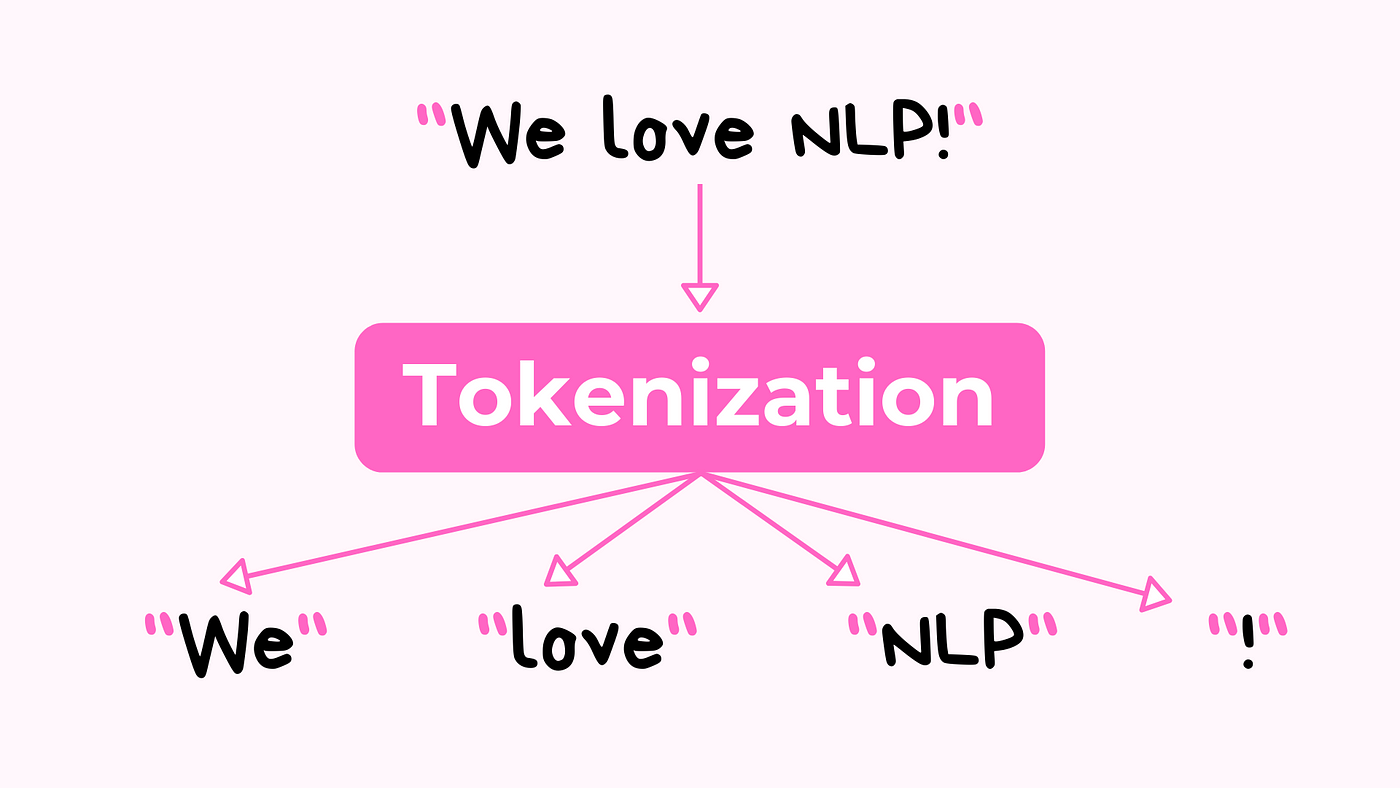

 And then let's create a '**model**' object *using the pre-trained BERT model 'bert-base-uncased'*. This model contains weights already trained on large amounts of text, specifically English Wikipedia text corpus

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

The tokenizer function converts the "sentence" into a representation that can be fed into the BERT model.

In [ ]:
sentence = "tonight is christmas and santa claus will give us presents"

tokens = tokenizer(sentence, return_tensors='pt') #The return_tensors='pt' flag indicates that the output should be returned in the PyTorch tensor format.

The *model*() function takes the previously obtained tokens and returns various outputs, those are our embeddings.
The with *torch.no_grad*() statement ensures that the model's parameters are not updated during this inference step.

In [ ]:
with torch.no_grad():
  outputs = model(**tokens)

The *last_hidden_state* tensor from the '*outputs*' dictionary represents the model's final hidden state representation for each input token. In other words, it encodes the information that the model has learned about each word in the sentence.

The mean is calculated along the token dimension (dim=1),  which is typically the token dimension.

This mean-pooled vector is often used as a representation of the entire sequence for downstream tasks or analysis. In the context of natural language processing and BERT, it provides a way to capture the semantic information of the entire input sequence.

In [ ]:
embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy() #squeeze().numpy() call flattens the tensor and converts it into a NumPy array.
print(f'The embeddings generated for "{sentence}" is: {embeddings}')

In [ ]:
synopsis = ["When their regal matriarch falls ill, the troubled Vuillard family come together for a hesitant Christmastime reunion. Among them is rebellious ne'er-do-well Henri and the uptight Elizabeth. Together under the same roof for the first time in many years, their intricate, long denied resentments and yearnings emerge again.",       #0
"In 1843 London, legendary author Charles Dickens is desperate for another success after a string of flops, and soon finds inspiration in the people around him and his own desire to be a better person. He begins to write his iconic novella A Christmas Carol, which eventually helps transform Christmas from a minor holiday into a celebration of family ties and goodwill.",   #1
"A little girl discovers dreams can come true if you really believe. Six-year-old Susan Walker has doubts about childhood's most enduring miracle - Santa Claus. Her mother told her the 'secret' about Santa a long time ago. But after meeting a special department store Santa who's convinced he's the real thing, Susan is given the most precious gift of all something to believe in.",       #2
"Scott Calvin is an ordinary man, who accidentally causes Santa Claus to fall from his roof on Christmas Eve and is knocked unconscious. When he and his young son finish Santa's trip and deliveries, they go to the North Pole, where Scott learns he must become the new Santa and convince those he loves that he is indeed, Father Christmas.",                 #3
"As a child, Lucy Cullins asked Santa Claus to bring her father home from Vietnam. But when her dad returned in a pine box, the embittered Lucy decided that Christmas -- and every other holiday for that matter -- was a humbug",   #4
"The daughter of a resort owner has mixed emotions about taking control of a mom-and-pop ski lodge after she meets the charming man in charge of the small winter wonderland in this holiday comedy-drama.",                      #5
"All of London is in love -- or longing to be -- in Four Weddings and a Funeral writer Richard Curtis' first directorial effort. Billed as the ultimate romantic comedy, Love Actually involves more than a dozen main characters, each weaving his or her way into another's heart over the course of one particularly eventful Christmas",                    #6
"Three different men of three different temperaments and tastes get involved in a long and adventure-filled battle in order to find a fortune in gold. While the first man, an ex-bounty hunter and a forgiving person, knows the name of the grave inwhich the gold is buried, the second, a fast-tempered greedy man, knows the name on the cemetery. But the third person, a cruel, cold-blooded murderer, knows about the gold first, but must find the location from the first two.",   #7
"The Man With No Name enters the Mexican village of San Miguel in the midst of a power struggle among the three Rojo brothers and sheriff John Baxter. When a regiment of Mexican soldiers bearing gold intended to pay for new weapons is waylaid by the Rojo brothers, the stranger inserts himself into the middle of the long-simmering battle, selling false information to both sides for his own benefit.",             #8
"The simple story has the pair coming to the rescue of peace-loving Mormons when land-hungry Major Harriman sends his bullies to harass them into giving up their fertile valley. Trinity and Bambino manage to save the Mormons and send the bad guys packing with slapstick humor instead of excessive violence, saving the day."]             #9

embeddings = []
for i in synopsis:
  tokens = tokenizer(i, return_tensors='pt')
  with torch.no_grad():
    outputs = model(**tokens)
  embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().numpy())

embeddings=np.array(embeddings)

In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
from scipy.stats import pearsonr

matrix = 1/pairwise_distances(embeddings, metric="euclidean")

<ipython-input-13-cde065c20df2>:6: RuntimeWarning: divide by zero encountered in divide
  matrix = 1/pairwise_distances(embeddings, metric="euclidean")


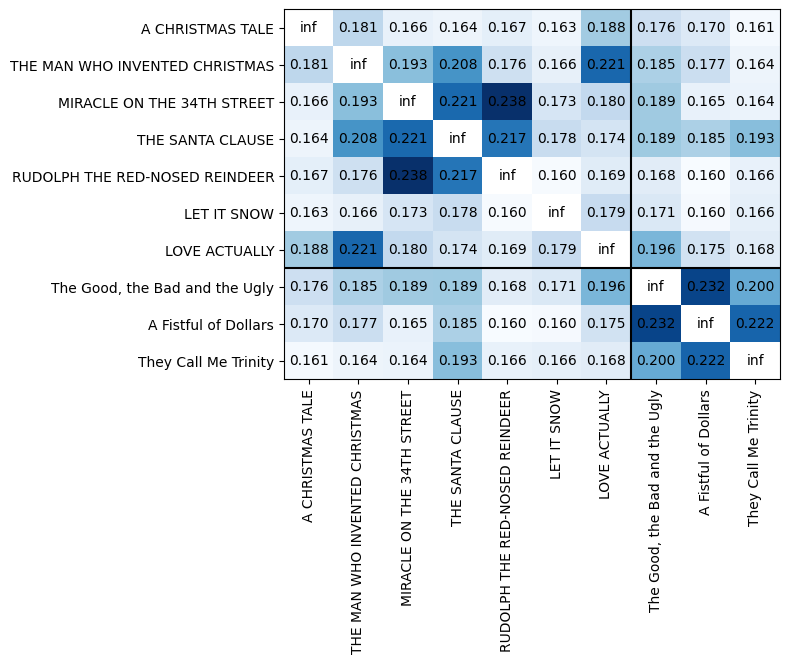

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(matrix, aspect='auto', cmap="Blues")

# add the values
for (i, j), value in np.ndenumerate(matrix):
    plt.text(i, j, "%.3f"%value, va='center', ha='center')

plt.xticks(ticks=range(10), labels=["A CHRISTMAS TALE",
"THE MAN WHO INVENTED CHRISTMAS",
"MIRACLE ON THE 34TH STREET",
"THE SANTA CLAUSE",
"RUDOLPH THE RED-NOSED REINDEER",
"LET IT SNOW",
"LOVE ACTUALLY",
"The Good, the Bad and the Ugly",
"A Fistful of Dollars",
"They Call Me Trinity"], rotation=90)
plt.yticks(range(10), labels=["A CHRISTMAS TALE",
"THE MAN WHO INVENTED CHRISTMAS",
"MIRACLE ON THE 34TH STREET",
"THE SANTA CLAUSE",
"RUDOLPH THE RED-NOSED REINDEER",
"LET IT SNOW",
"LOVE ACTUALLY",
"The Good, the Bad and the Ugly",
"A Fistful of Dollars",
"They Call Me Trinity"])
plt.axvline(x=6.5, color='black')
plt.axhline(y=6.5, color='black')
plt.show()